# CoX Regression

In [1]:
from lifelines.utils.concordance import _concordance_summary_statistics, _concordance_ratio, concordance_index
from lifelines.fitters import RegressionFitter, SemiParametricRegressionFitter, ParametricRegressionFitter
from lifelines.fitters.mixins import SplineFitterMixin, ProportionalHazardMixin
from lifelines.statistics import _chisq_test_p_value, StatisticalResult
from lifelines.plotting import set_kwargs_drawstyle
from lifelines.utils.safe_exp import safe_exp
from lifelines.utils.printer import Printer
from lifelines import exceptions
from lifelines import utils


In [206]:
import pandas as pd
df = pd.read_csv('miRNAexpressiontest.csv')
df.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Survival,SurvivalStatus
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,2.4290,0.0000,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284,3.353388,0
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,4.3008,0.2781,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989,12.788901,1
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,4.1204,0.0000,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215,42.344741,0
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,3.2618,0.0000,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794,8.153335,0
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,4.7225,0.0000,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741,23.835355,0


In [207]:
from lifelines import CoxPHFitter

In [1]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi


cph = CoxPHFitter()
#cph.fit(new_df, duration_col='Survival', event_col='Overall Survival Status')
#cph.print_summary()  # access the individual results using cph.summary

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sksurv.datasets import load_breast_cancer
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

set_config(display="text")  # displays text representation of estimators

In [169]:
import pandas as pd
df = pd.read_csv('miRNAexpressiontest.csv')
df.head()


,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Survival,SurvivalStatus
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,2.4290,0.0000,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284,3.353388,0
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,4.3008,0.2781,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989,12.788901,1
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,4.1204,0.0000,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215,42.344741,0
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,3.2618,0.0000,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794,8.153335,0
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,4.7225,0.0000,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741,23.835355,0


In [170]:
df=df.fillna(value=0)
df.isnull().sum()
df2=np.array(df)
# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(df2[:, i][df2[:, i] != -np.inf]) for i in range(df2.shape[1])]
maxs = [np.nanmax(df2[:, i][df2[:, i] != np.inf]) for i in range(df2.shape[1])]

#df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [171]:
for i in range(df.shape[1]):
    df2[:, i][df2[:, i] == -np.inf] = mins[i]
    df2[:, i][df2[:, i] == np.inf] = maxs[i]

In [173]:
#count = np.isinf(df2).values.sum()
count

0

In [174]:
df2=pd.DataFrame(df2)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,834,835,836,837,838,839,840,841,842,843
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,2.4290,0.0000,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284,3.353388,0.0
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,4.3008,0.2781,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989,12.788901,1.0
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,4.1204,0.0000,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215,42.344741,0.0
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,3.2618,0.0000,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794,8.153335,0.0
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,4.7225,0.0000,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741,23.835355,0.0


In [175]:
Y2=df2[df2.columns[843:]].astype(bool)
Y2=pd.DataFrame(Y2)

Y3=df2[df2.columns[842]]
Y3=pd.DataFrame(Y3)

Y3=Y3.drop(Y3[Y3.columns[843:]], axis=1)
#print(Y3)
Y4=pd.concat([Y2,Y3], axis=1)
Y4


,843,842
0,False,3.353388
1,True,12.788901
2,False,42.344741
3,False,8.153335
4,False,23.835355
...,...,...
144,True,6.016372
145,False,11.901239
146,False,10.224545
147,False,11.342341


In [113]:
"""
Y2=df.SurvivalStatus
Y2=pd.DataFrame(Y2)
Y2['SurvivalStatus'] = Y2['SurvivalStatus'].astype(bool)
Y2
Y3=df.Survival
Y3=pd.DataFrame(Y3)
Y4=pd.concat([Y2,Y3], axis=1)
Y4
""""

SyntaxError: unterminated string literal (detected at line 10) (60755014.py, line 10)

In [178]:
y = Y4.to_records(index=False)
y

rec.array([(False,  3.35338791), ( True, 12.78890094),
           (False, 42.34474143), (False,  8.15333531),
           (False, 23.83535523), (False, 20.48196732),
           (False, 65.58832232), ( True, 53.06243219),
           ( True, 11.3094651 ), (False, 21.17237071),
           ( True, 14.82723477), ( True,  3.55064602),
           ( True, 12.62451918), (False,  2.16983923),
           (False, 41.85159615), (False, 15.221751  ),
           (False, 28.10928099), (False, 20.44909097),
           (False,  6.47664135), (False, 27.91202288),
           (False, 11.53959957), (False,  6.83828122),
           ( True,  3.1561298 ), (False, 14.4655949 ),
           ( True,  7.82457179), ( True,  2.26846829),
           ( True,  8.74510964), ( True,  7.89032449),
           (False, 20.48196732), (False, 16.40529967),
           (False,  6.14787783), (False,  2.79448992),
           (False, 22.42167209), (False, 36.72288523),
           (False, 33.69826084), (False, 50.20218957),
          

In [179]:
#new_df=df.drop(labels=[ 'Survival',  'SurvivalStatus' ], axis=1)
new_df=df2.drop((df2[df2.columns[842:]]), axis=1)
count = np.isinf(new_df).values.sum()
count
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,832,833,834,835,836,837,838,839,840,841
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,1.6747,0.0,2.4290,0.0000,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,4.0275,0.0,4.3008,0.2781,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,3.0046,0.0,4.1204,0.0000,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,3.0337,0.0,3.2618,0.0000,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,2.4901,0.0,4.7225,0.0000,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741


In [201]:
#new_df.isnull().sum()
#np.where(new_df.values >= np.finfo(np.float64).max)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.25)

In [218]:
alphas = 0.00015 
coefficients = {}

cph = CoxPHSurvivalAnalysis()
cph.set_params(alpha=alpha)
cph.fit(X_train, y_train)
key = round(alpha, 5)
coefficients[key] = cph.coef_

    
coefficients = pd.DataFrame.from_dict(coefficients).rename_axis(index="feature", columns="alpha").set_index(new_df.columns)

In [202]:
alphas = 10.0 ** np.linspace(-4, 4, 50)
coefficients = {}

cph = CoxPHSurvivalAnalysis()
for alpha in alphas:
    cph.set_params(alpha=alpha)
    cph.fit(X_train, y_train)
    key = round(alpha, 5)
    coefficients[key] = cph.coef_

coefficients = pd.DataFrame.from_dict(coefficients).rename_axis(index="feature", columns="alpha").set_index(new_df.columns)

C:\Users\Lenovo\anaconda3\envs\Hover-net\lib\site-packages\sksurv\linear_model\coxph.py:170: RuntimeWarning: overflow encountered in exp
  risk_set2 += np.exp(xw[k])
C:\Users\Lenovo\anaconda3\envs\Hover-net\lib\site-packages\sksurv\linear_model\coxph.py:170: RuntimeWarning: overflow encountered in exp
  risk_set2 += np.exp(xw[k])
C:\Users\Lenovo\anaconda3\envs\Hover-net\lib\site-packages\sksurv\linear_model\coxph.py:170: RuntimeWarning: overflow encountered in exp
  risk_set2 += np.exp(xw[k])
C:\Users\Lenovo\anaconda3\envs\Hover-net\lib\site-packages\sksurv\linear_model\coxph.py:173: RuntimeWarning: overflow encountered in exp
  risk_set += np.exp(xw[k])
C:\Users\Lenovo\anaconda3\envs\Hover-net\lib\site-packages\sksurv\linear_model\coxph.py:170: RuntimeWarning: overflow encountered in exp
  risk_set2 += np.exp(xw[k])
C:\Users\Lenovo\anaconda3\envs\Hover-net\lib\site-packages\sksurv\linear_model\coxph.py:173: RuntimeWarning: overflow encountered in exp
  risk_set += np.exp(xw[k])
C:\Use

In [219]:
cph.score(X_test, y_test)


0.6424870466321243

In [220]:
print(coefficients)

alpha   10000.0
0     -0.000010
1     -0.000009
2     -0.000016
3     -0.000435
4     -0.000242
..          ...
837    0.001190
838   -0.000895
839    0.000574
840   -0.000742
841   -0.000102

[842 rows x 1 columns]


In [182]:
print(coefficients)

alpha  0.00010      0.00015      0.00021      0.00031      0.00045      \
0        -1.764723    -1.669829    -1.575867    -1.482948    -1.391202   
1        -1.760966    -1.666224    -1.572415    -1.479648    -1.388054   
2        -1.612266    -1.525632    -1.439847    -1.355013    -1.271249   
3        -0.617969    -0.585763    -0.553876    -0.522351    -0.491238   
4         0.236594     0.226192     0.215879     0.205663     0.195554   
..             ...          ...          ...          ...          ...   
837      10.330948     9.760019     9.194827     8.636065     8.084552   
838      -9.725091    -9.189355    -8.659012    -8.134711    -7.617214   
839       5.676073     5.368427     5.063807     4.762568     4.465130   
840       2.202713     2.086098     1.970642     1.856482     1.743780   
841      -1.843198    -1.751640    -1.660946    -1.571212    -1.482552   

alpha  0.00066      0.00095      0.00139      0.00202      0.00295      ...  \
0        -1.300782    -1.211866 

In [221]:
def plot_coefficients(coefs, n_highlight):
    _, ax = plt.subplots(figsize=(9, 6))
    n_features = coefs.shape[0]
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(alpha_min, coef, name + "   ", horizontalalignment="right", verticalalignment="center")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")


TypeError: unsupported operand type(s) for +: 'int' and 'str'

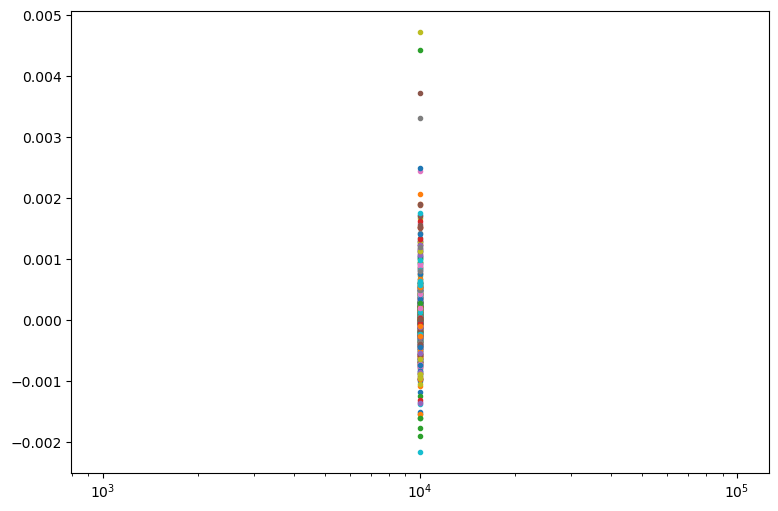

In [222]:
plot_coefficients(coefficients, n_highlight=5)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

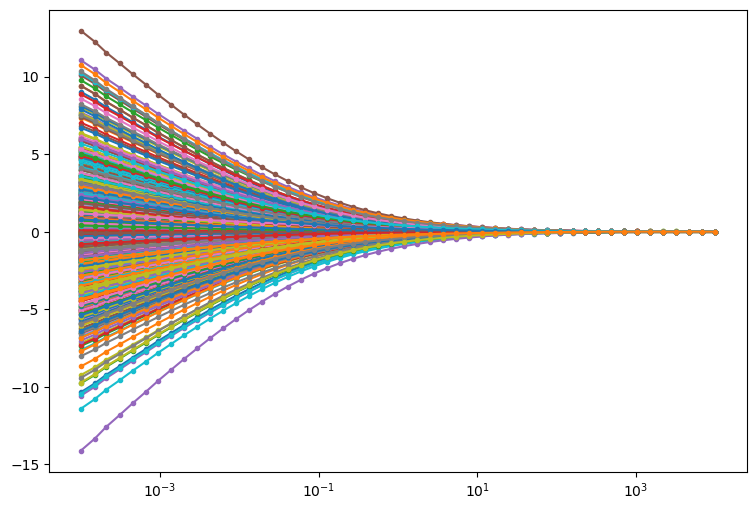

In [189]:
plot_coefficients(coefficients, n_highlight=5)

# Lasso Cox Regression

In [223]:
cox_elastic_net = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01)
cox_elastic_net.fit(X_train, y_train)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9)

In [224]:
cox_elastic_net.score(X_test,y_test)

0.5207253886010362

In [225]:
coefficients_elastic_net = pd.DataFrame(
    cox_elastic_net.coef_, index=new_df.columns, columns=np.round(cox_elastic_net.alphas_, 5)
)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

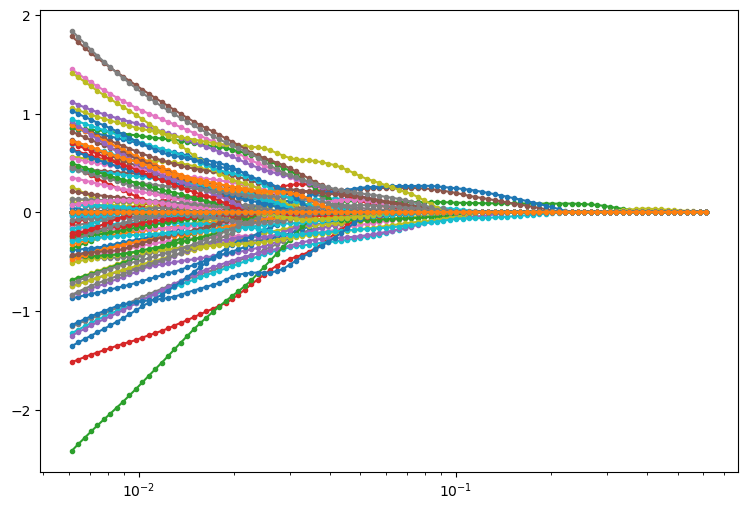

In [226]:
plot_coefficients(coefficients_elastic_net, n_highlight=5)


# Elastic Net

In [227]:
cox_elastic_net = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01)
cox_elastic_net.fit(X_train, y_train)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9)

In [228]:
cox_elastic_net.score(X_test,y_test)

0.5207253886010362

TypeError: unsupported operand type(s) for +: 'int' and 'str'

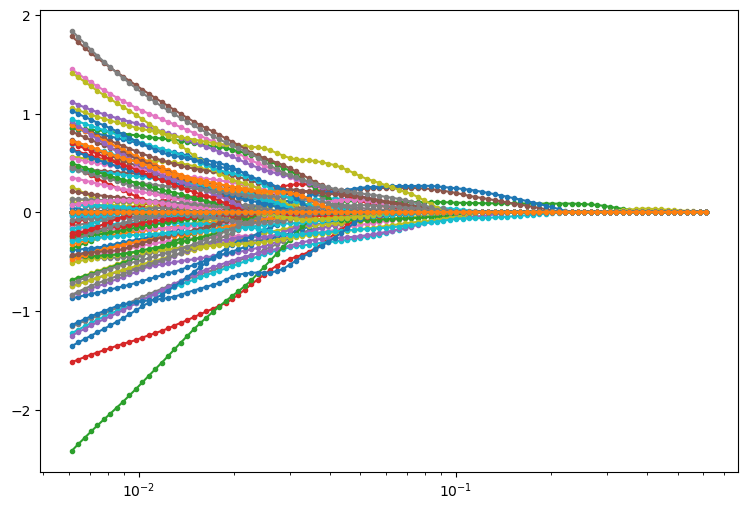

In [229]:
oefficients_elastic_net = pd.DataFrame(
    cox_elastic_net.coef_, index=new_df.columns, columns=np.round(cox_elastic_net.alphas_, 5)
)

plot_coefficients(coefficients_elastic_net, n_highlight=5)

# Choosing penalty strength Alpfa

In [230]:
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe =  CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe.fit(new_df, y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9, max_iter=100)

In [231]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=1,
).fit(new_df, y)

cv_results = pd.DataFrame(gcv.cv_results_)

AttributeError: 'CoxnetSurvivalAnalysis' object has no attribute 'named_steps'

# Survival and Cumulative Hazard Function

In [232]:
coxnet_pred =  CoxnetSurvivalAnalysis(l1_ratio=0.9, fit_baseline_model=True)
coxnet_pred.set_params(**gcv.best_params_)
coxnet_pred.fit(new_df, y)

NameError: name 'gcv' is not defined

In [233]:
from sklearn.inspection import permutation_importance

result = permutation_importance(cph, X_test, y_test, n_repeats=15)


In [234]:
pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
532,0.004318,0.002044
218,0.003627,0.012578
76,0.003627,0.003514
550,0.003627,0.002961
116,0.003109,0.003807
...,...,...
799,-0.005527,0.002971
482,-0.005527,0.004717
125,-0.005527,0.011148
558,-0.005872,0.001761


# Lungs Cancer

In [2]:
import pandas as pd
df = pd.read_csv('miRNA12.csv')
df.head()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-96-3p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p,OS_days,PFS_event
0,0.2372,6.8868,16.0754,4.3936,12.1407,1.8447,10.3022,7.8107,12.3262,3.0425,...,0.0000,6.2253,1.7328,11.3658,1.6114,10.2204,6.5796,11.5166,1425,0
1,0.5782,6.1067,15.5682,5.1750,12.1485,1.9848,10.0580,8.4284,12.1403,3.7885,...,0.3179,7.5392,0.7987,10.9484,1.7406,10.0831,6.0859,11.3148,1418,0
2,0.4842,6.9693,17.2549,6.7587,14.3658,3.1662,12.3041,9.3820,12.5467,3.3085,...,0.0000,5.2260,2.3565,10.6058,2.6288,10.5558,6.3523,10.6756,0,0
3,0.2998,6.0993,15.4141,4.6114,12.6769,1.3878,9.7117,7.3923,11.3293,3.8706,...,1.6224,8.6580,1.6755,10.4907,1.8240,9.9885,7.7412,12.8671,422,0
4,0.5061,6.3537,15.9168,5.0323,12.9183,1.7273,10.8604,8.2581,12.1654,3.8630,...,0.2751,6.2319,1.5315,11.4967,2.6199,11.2061,6.5427,11.5900,419,1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sksurv.datasets import load_breast_cancer
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

set_config(display="text")  # displays text representation of estimators

In [5]:
df=df.fillna(value=0)
df.isnull().sum()
df2=np.array(df)
# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(df2[:, i][df2[:, i] != -np.inf]) for i in range(df2.shape[1])]
maxs = [np.nanmax(df2[:, i][df2[:, i] != np.inf]) for i in range(df2.shape[1])]

#df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
for i in range(df.shape[1]):
    df2[:, i][df2[:, i] == -np.inf] = mins[i]
    df2[:, i][df2[:, i] == np.inf] = maxs[i]

In [8]:
df2=pd.DataFrame(df2)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583
0,0.2372,6.8868,16.0754,4.3936,12.1407,1.8447,10.3022,7.8107,12.3262,3.0425,...,0.0000,6.2253,1.7328,11.3658,1.6114,10.2204,6.5796,11.5166,1425.0,0.0
1,0.5782,6.1067,15.5682,5.1750,12.1485,1.9848,10.0580,8.4284,12.1403,3.7885,...,0.3179,7.5392,0.7987,10.9484,1.7406,10.0831,6.0859,11.3148,1418.0,0.0
2,0.4842,6.9693,17.2549,6.7587,14.3658,3.1662,12.3041,9.3820,12.5467,3.3085,...,0.0000,5.2260,2.3565,10.6058,2.6288,10.5558,6.3523,10.6756,0.0,0.0
3,0.2998,6.0993,15.4141,4.6114,12.6769,1.3878,9.7117,7.3923,11.3293,3.8706,...,1.6224,8.6580,1.6755,10.4907,1.8240,9.9885,7.7412,12.8671,422.0,0.0
4,0.5061,6.3537,15.9168,5.0323,12.9183,1.7273,10.8604,8.2581,12.1654,3.8630,...,0.2751,6.2319,1.5315,11.4967,2.6199,11.2061,6.5427,11.5900,419.0,1.0


In [9]:
Y2=df2[df2.columns[2583:]].astype(bool)
Y2=pd.DataFrame(Y2)

Y3=df2[df2.columns[2582]]
Y3=pd.DataFrame(Y3)

Y3=Y3.drop(Y3[Y3.columns[2583:]], axis=1)
#print(Y3)
Y4=pd.concat([Y2,Y3], axis=1)
Y4


,2583,2582
0,False,1425.0
1,False,1418.0
2,False,0.0
3,False,422.0
4,True,419.0
...,...,...
105,False,888.0
106,False,30.0
107,False,1111.0
108,False,1106.0


In [10]:
y = Y4.to_records(index=False)
y

rec.array([(False, 1425.), (False, 1418.), (False,    0.), (False,  422.),
           ( True,  419.), (False,  353.), (False,    0.), (False,  445.),
           (False,    7.), (False,    7.), (False, 1837.), (False,  577.),
           ( True, 1805.), (False, 1790.), ( True, 1703.), ( True,  889.),
           (False, 1794.), (False, 1802.), (False,  578.), (False, 1157.),
           (False,  606.), (False,  141.), ( True,  162.), (False, 1916.),
           (False,   38.), ( True, 1801.), (False,   23.), (False,   73.),
           (False, 1435.), (False, 1595.), ( True,  717.), (False, 1617.),
           ( True, 1046.), (False,  594.), (False, 1799.), (False,  671.),
           (False, 1133.), ( True,  931.), ( True, 1376.), (False,  627.),
           (False, 1013.), ( True,  447.), ( True,  842.), (False,  376.),
           (False,  308.), (False,  355.), (False, 1721.), (False,    0.),
           (False,  668.), (False,   49.), (False, 1832.), ( True, 1848.),
           (False,   60.)

In [11]:
#new_df=df.drop(labels=[ 'Survival',  'SurvivalStatus' ], axis=1)
new_df=df2.drop((df2[df2.columns[2582:]]), axis=1)
count = np.isinf(new_df).values.sum()
count
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581
0,0.2372,6.8868,16.0754,4.3936,12.1407,1.8447,10.3022,7.8107,12.3262,3.0425,...,0.0000,0.0,0.0000,6.2253,1.7328,11.3658,1.6114,10.2204,6.5796,11.5166
1,0.5782,6.1067,15.5682,5.1750,12.1485,1.9848,10.0580,8.4284,12.1403,3.7885,...,0.0000,0.0,0.3179,7.5392,0.7987,10.9484,1.7406,10.0831,6.0859,11.3148
2,0.4842,6.9693,17.2549,6.7587,14.3658,3.1662,12.3041,9.3820,12.5467,3.3085,...,0.0000,0.0,0.0000,5.2260,2.3565,10.6058,2.6288,10.5558,6.3523,10.6756
3,0.2998,6.0993,15.4141,4.6114,12.6769,1.3878,9.7117,7.3923,11.3293,3.8706,...,0.2998,0.0,1.6224,8.6580,1.6755,10.4907,1.8240,9.9885,7.7412,12.8671
4,0.5061,6.3537,15.9168,5.0323,12.9183,1.7273,10.8604,8.2581,12.1654,3.8630,...,0.0000,0.0,0.2751,6.2319,1.5315,11.4967,2.6199,11.2061,6.5427,11.5900


In [12]:
#new_df.isnull().sum()
#np.where(new_df.values >= np.finfo(np.float64).max)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.25)

In [16]:
alpha = 0.001 
coefficients = {}

cph = CoxPHSurvivalAnalysis()
cph.set_params(alpha=alpha)
cph.fit(X_train, y_train)
key = round(alpha, 5)
coefficients[key] = cph.coef_

    
coefficients = pd.DataFrame.from_dict(coefficients).rename_axis(index="feature", columns="alpha").set_index(new_df.columns)

In [17]:
cph.score(X_test, y_test)

0.5581395348837209